<a href="https://colab.research.google.com/github/Sornambal/Cognifyz-Technology-Internship-Level-1/blob/main/Cognifyz_DS_Level_1_(task_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [2]:
# Load the dataset
df = pd.read_csv("/content/Dataset .csv")

In [3]:
# 1. Drop rows with missing latitude or longitude
df_geo = df.dropna(subset=['Latitude', 'Longitude'])


In [8]:
# 2. Create an interactive map with restaurant markers
restaurant_map = folium.Map(location=[df_geo['Latitude'].mean(), df_geo['Longitude'].mean()], zoom_start=2)
marker_cluster = MarkerCluster().add_to(restaurant_map)

for _, row in df_geo.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']} - Rating: {row['Aggregate rating']}",
    ).add_to(marker_cluster)

# Save map to HTML
restaurant_map.save("restaurant_map.html")

In [7]:

# 3. Distribution of restaurants by country and city
print("📍 Top 10 Countries by Restaurant Count:\n")
print(df['Country Code'].value_counts().head(10))

print("\n🏙️ Top 10 Cities by Restaurant Count:\n")
print(df['City'].value_counts().head(10))

📍 Top 10 Countries by Restaurant Count:

Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64

🏙️ Top 10 Cities by Restaurant Count:

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


<ipython-input-10-703368276>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="Blues_d")


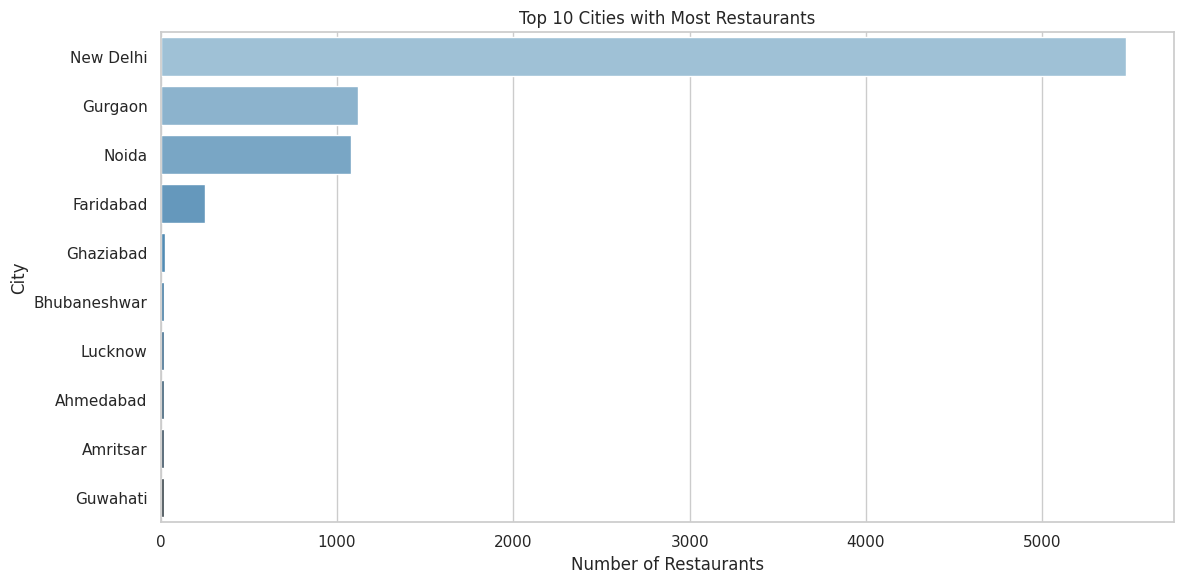

In [10]:
# 1. Top 10 Cities with Most Restaurants
plt.figure(figsize=(12, 6))
top_cities = df['City'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette="Blues_d")
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.tight_layout()
plt.show()


<ipython-input-11-2670062729>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index.astype(str), palette="Greens_d")


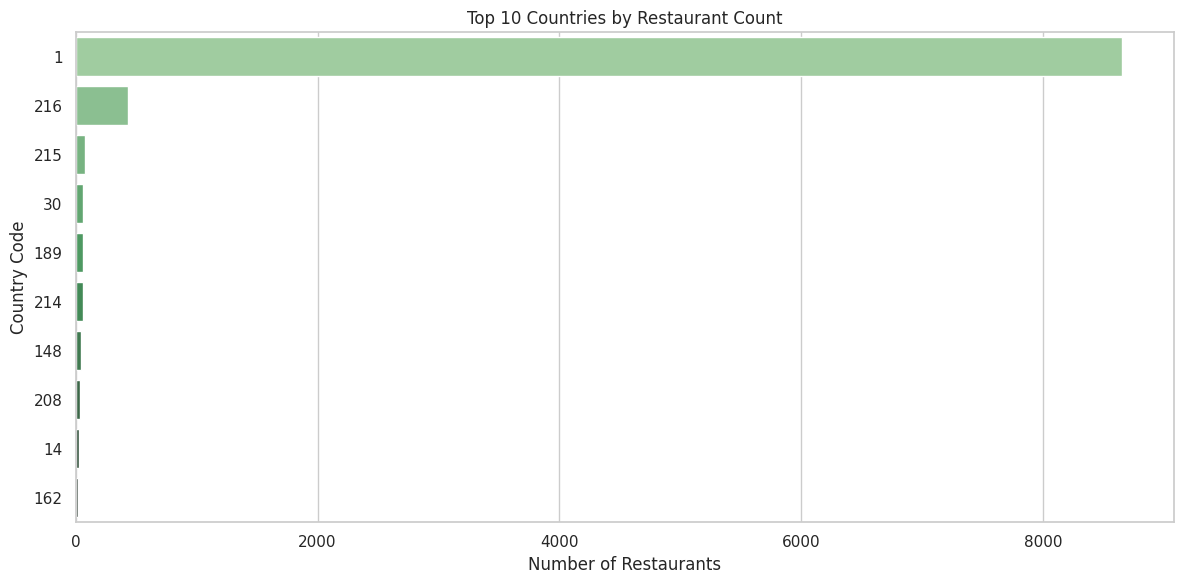

In [11]:
# 2. Top 10 Countries by Restaurant Count
plt.figure(figsize=(12, 6))
top_countries = df['Country Code'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index.astype(str), palette="Greens_d")
plt.title("Top 10 Countries by Restaurant Count")
plt.xlabel("Number of Restaurants")
plt.ylabel("Country Code")
plt.tight_layout()
plt.show()

In [6]:
# 4. Correlation between location and ratings
correlation_lat = df_geo['Latitude'].corr(df_geo['Aggregate rating'])
correlation_long = df_geo['Longitude'].corr(df_geo['Aggregate rating'])

print(f"\n📈 Correlation between Latitude and Rating: {correlation_lat}")
print(f"📉 Correlation between Longitude and Rating: {correlation_long}")


📈 Correlation between Latitude and Rating: 0.0005155806902359908
📉 Correlation between Longitude and Rating: -0.11681757734540431
